In [1]:
import torch
from torch.utils.data import Dataset
from xml.etree import ElementTree as ET
import os
from PIL import Image
import matplotlib.pyplot as plt
from typing import Dict
import numpy as np

In [2]:
datadir = '../data/ibug_300W_large_face_landmark_dataset'
xml_path = os.path.join(datadir,'labels_ibug_300W_train.xml')
root = ET.parse(xml_path).getroot()

In [3]:
samples = root.find('images')

(68, 2)


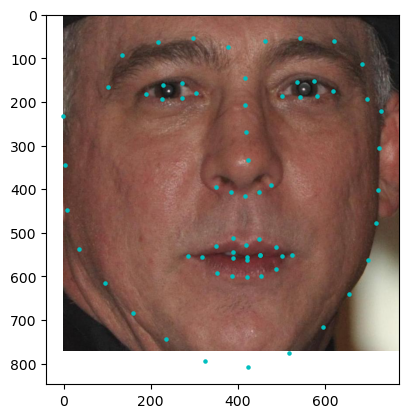

In [26]:
def get_cropped_labeled_sample(sample: ET.Element) -> Dict:
    filename = sample.attrib['file']
    width = int(sample.attrib['width'])
    height = int(sample.attrib['height'])
    
    box = sample.find('box')
    box_top = int(box.attrib['top'])
    box_left = int(box.attrib['left'])
    box_width = int(box.attrib['width'])
    box_height = int(box.attrib['height'])
    
    landmarks = np.array([
        [float(part.attrib['x']), float(part.attrib['y'])] for part in box
    ])
    landmarks -= np.array([box_left, box_top]) # crop
    landmarks /= np.array([box_width, box_height])
    landmarks -= 0.5
        
    return dict(
        filename=filename, width=width, height=height,
        box_top=box_top, box_left=box_left, box_width=box_width, box_height=box_height, 
        landmarks=landmarks,
        # original_image=original_image, cropped_image=cropped_image,
    )

def show_sample(datadir, sample: Dict):
    filename = sample['filename']
    box_top: int = sample['box_top']
    box_left: int = sample['box_left']
    box_width: int = sample['box_width']
    box_height: int = sample['box_height']    
    landmarks: np.ndarray = (sample['landmarks'] + 0.5) * np.array([box_width, box_height])
    original_image: Image = Image.open( os.path.join(datadir, filename) )
    cropped_image: Image = original_image.crop((box_left, box_top, box_left+box_width, box_top+box_height))
    
    plt.imshow(cropped_image)
    plt.scatter(landmarks[:,0], landmarks[:,1], s=5, c='c')
    print(landmarks.shape)

for i, sample in enumerate(samples):
    sample = get_cropped_labeled_sample(sample)
    # print(sample) #, landmarks)
    if i == 2000: break
show_sample(datadir, sample)

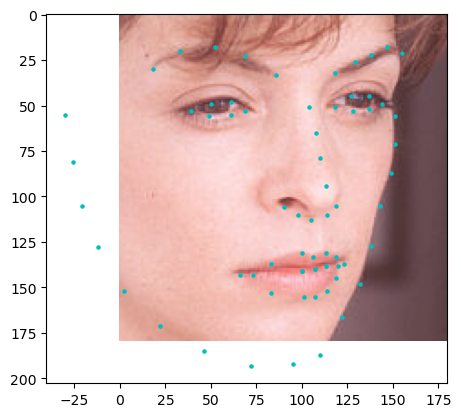